!pip3 install matplotlib

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

In [29]:
time = np.arange(0, 10, 0.001)
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)
sin4 = sin_wave(4, 20, time)
sin5 = sin_wave(4, 15, time)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green')
plt.legend(); plt.grid(); plt.show()

In [ ]:
sin_sum = sin1 + sin2 + sin3 + sin4 + sin5

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='green', alpha=0.5)
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue', alpha=0.5)
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='magenta', alpha=0.5)
plt.plot(time, sin_sum, label="sum_of_sin", color='black', lw=0.8)
plt.legend(); plt.grid(); plt.show()

In [31]:
n = len(sin_sum) 
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))]

In [32]:
Y = np.fft.fft(sin_sum)/n 
Y = Y[range(int(n/2))]

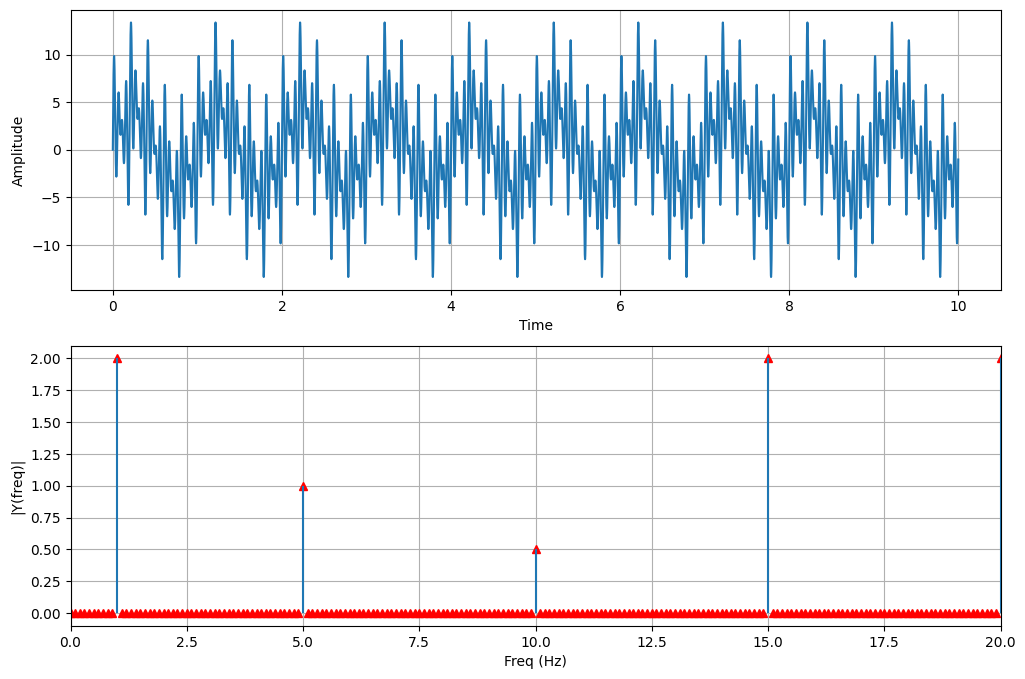

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

In [34]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))

In [ ]:
time = np.arange(0, 40, 0.001)

plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

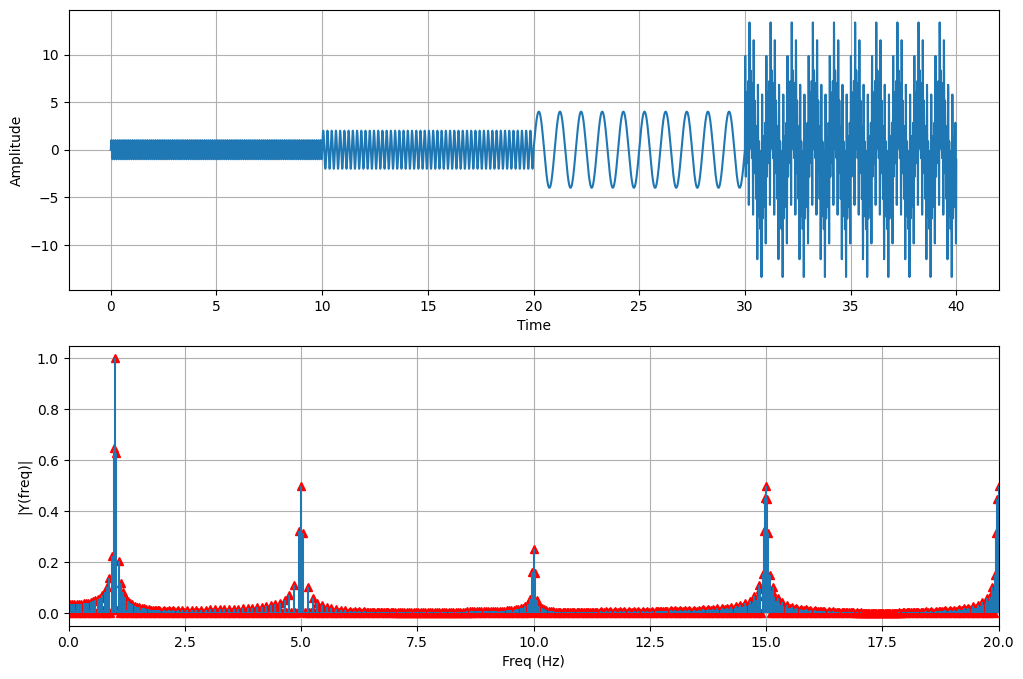

In [37]:
n = len(sin_concat) 
k = np.arange(n)
Fs = 1/0.001; T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))] 
Y = np.fft.fft(sin_concat)/n 
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_concat)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([0, 20])
ax[1].vlines(freq, [0], abs(Y)); ax[1].grid(True)
plt.show()

In [38]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

#!python -m pip install matplotlib
#!python -m pip install pandas
#!python -m pip install scikit-learn

In [41]:
from scipy import signal

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

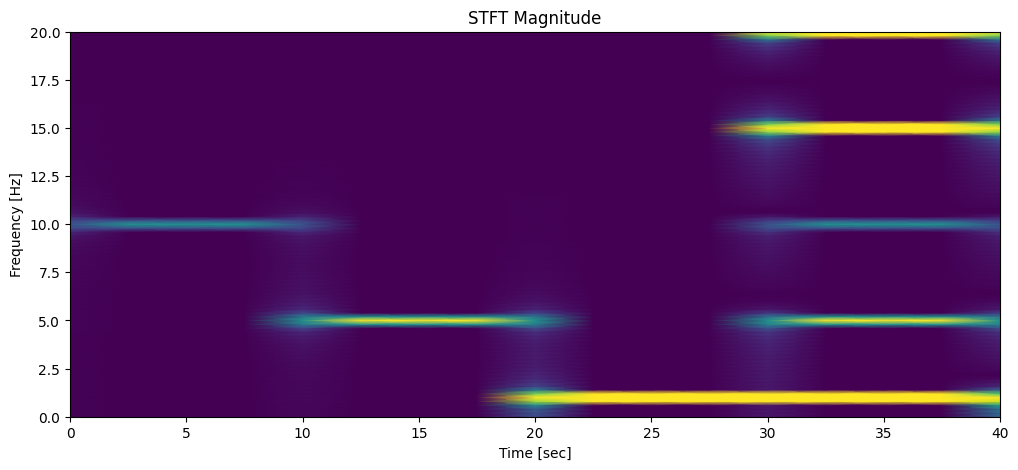

In [42]:
calc_stft(5000)